In [1]:
import pandas as pd
import numpy as np

In [14]:
df = pd.DataFrame(pd.read_excel('DATA FILE 334 (2).xlsx')) 
df.head()

,Part ID,Planning Leadtime,Order Policy,Order Point,Safety Stock Qty,Fixed Order Qty,Days Of Supply,Minimum Order Qty,Maximum Order Qty,Multiple Order Qty,...,June (2019),July (2019),Aug (2019),Sep (2019),Oct (2019),Nov (2019),Dec (2019),Annual 1,Annual 2,ANNUAL DEMAND
0,1.548500e+05,14,P,NaN,0.0,NaN,30.0,50.0,NaN,NaN,...,7.0,7.0,6.0,6.0,6.0,6.0,6.0,74.0,74.0,74.0
1,3.684600e+06,35,D,NaN,5.0,NaN,NaN,NaN,NaN,5.0,...,10.0,4.0,10.0,11.0,11.0,11.0,11.0,118.0,118.0,118.0
2,3.270501e+09,56,P,NaN,NaN,NaN,30.0,25.0,NaN,25.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,57.0,57.0,57.0
3,3.270820e+09,35,P,NaN,NaN,NaN,60.0,NaN,NaN,NaN,...,5.0,4.0,5.0,6.0,5.0,5.0,5.0,57.0,58.0,58.0
4,3.275500e+09,49,P,NaN,NaN,NaN,28.0,12.0,NaN,1.0,...,5.0,5.0,4.0,4.0,4.0,4.0,4.0,52.0,52.0,52.0


48       6.791276
660     12.266104
579     17.540043
581     22.812616
621     25.479522
          ...    
212    100.000000
211    100.000000
210    100.000000
204    100.000000
688    100.000000
Name: Cumulative % Cost Spent, Length: 689, dtype: float64


<Figure size 1000x600 with 0 Axes>

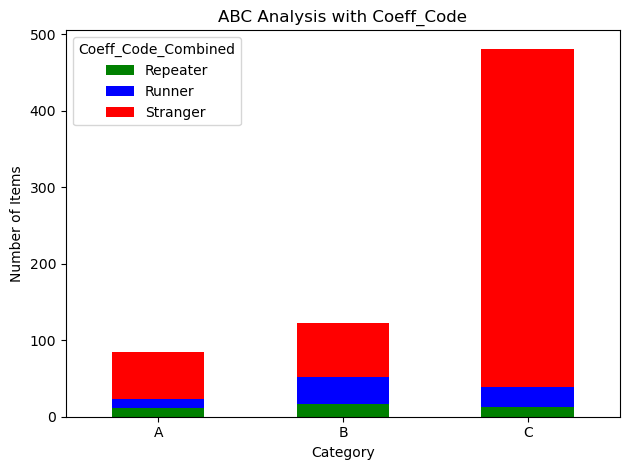

In [17]:

df['Annual Cost Spent'] = df['Unit Material Cost'] * df['Annual Usage Qty']

# Sort DataFrame by 'Annual Cost Spent' in descending order
df = df.sort_values(by='Annual Cost Spent', ascending=False)

# Calculate cumulative sum of cost spent
df['Cumulative Cost Spent'] = df['Annual Cost Spent'].cumsum()

# Calculate cumulative percentage of cost spent
total_cost = df['Annual Cost Spent'].sum()
df['Cumulative % Cost Spent'] = (df['Cumulative Cost Spent'] / total_cost) * 100

# Display the DataFrame
print(df['Cumulative % Cost Spent'])

category_A_boundary = 80  # Top 20% of items
category_B_boundary = 95  # Next 15% of items

# Categorize items based on cumulative percentage of cost spent
def categorize(item):
    if item['Cumulative % Cost Spent'] <= category_A_boundary:
        return 'A'
    elif item['Cumulative % Cost Spent'] <= category_B_boundary:
        return 'B'
    else:
        return 'C'

# Apply categorization function to each row
df['Category'] = df.apply(categorize, axis=1)
df['Coeff_Code_Combined'] = df['Coeff_Code'].replace({'Spiker': 'Stranger'})

grouped_df = df.groupby(['Category', 'Coeff_Code_Combined']).size().unstack(fill_value=0)

# Plot the stacked bar graph
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar', stacked=True, color=['green', 'blue', 'red'])
plt.title('ABC Analysis with Coeff_Code')
plt.xlabel('Category')
plt.ylabel('Number of Items')
plt.xticks(rotation=0)
plt.legend(title='Coeff_Code_Combined')
plt.tight_layout()
plt.show()
# # Calculate the number of parts in each category
# num_parts_A = int(689 * 0.70)
# num_parts_B = int(689* 0.20)
# num_parts_C = int(689 - num_parts_A - num_parts_B)

# # Calculate the number of part IDs in each category
# count_A = df.head(num_parts_A)['Part ID'].nunique()
# count_B = df[num_parts_A:num_parts_A + num_parts_B]['Part ID'].nunique()
# count_C = df.tail(num_parts_C)['Part ID'].nunique()

# print("Count of part IDs for A category (top 20%):", count_A)
# print("Count of part IDs for B category (next 30%):", count_B)
# print("Count of part IDs for C category (last 50%):", count_C)

# # Add ABC categorization to the DataFrame as a new column
# abc_categories = ['A'] * num_parts_A + ['B'] * num_parts_B + ['C'] * num_parts_C
# df['ABC_Category'] = abc_categories

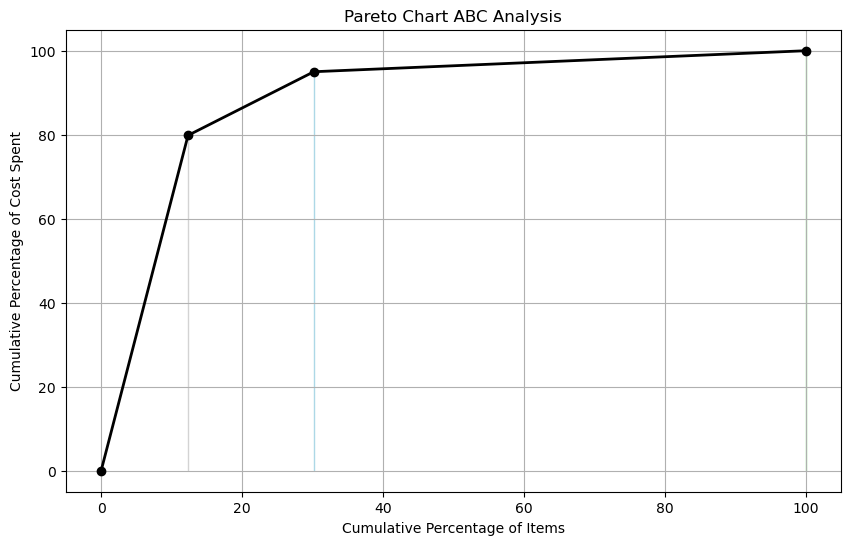

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrame with 'Category' and 'Coeff_Code_Combined' columns
# df should contain at least these columns
# Let's assume df already contains these columns
# df = ...

df = df.sort_values(by='Annual Cost Spent', ascending=False)
# Count the occurrences of each category
category_counts = df['Category'].value_counts().sort_index()

# Calculate cumulative sum of category counts
cumulative_counts = category_counts.cumsum()

# Calculate the cumulative percentage of items
cumulative_percentage_items = (cumulative_counts / cumulative_counts.max()) * 100

# Calculate the cumulative percentage of cost spent
cumulative_cost_spent = df.groupby('Category')['Annual Cost Spent'].sum().cumsum()
total_cost = df['Annual Cost Spent'].sum()
cumulative_percentage_cost = (cumulative_cost_spent / total_cost) * 100

# Create masks for different ranges of cumulative cost spent percentages
mask_80 = np.concatenate(([False], cumulative_percentage_cost < 80))
mask_95 = np.concatenate(([False], (cumulative_percentage_cost >= 80) & (cumulative_percentage_cost < 95)))
mask_100 = np.concatenate(([False], cumulative_percentage_cost >= 95))

# Plot the Pareto chart
plt.figure(figsize=(10, 6))

# Plot the main line with bolder properties
plt.plot([0] + list(cumulative_percentage_items), [0] + list(cumulative_percentage_cost), marker='o', linestyle='-', color='black', linewidth=2)

# Fill the areas under the curve with different colors based on masks
plt.fill_between([0] + list(cumulative_percentage_items), [0] + list(cumulative_percentage_cost), color='lightgray', where=mask_80)
plt.fill_between([0] + list(cumulative_percentage_items), [0] + list(cumulative_percentage_cost), color='lightblue', where=mask_95)
plt.fill_between([0] + list(cumulative_percentage_items), [0] + list(cumulative_percentage_cost), color='lightgreen', where=mask_100)

plt.xlabel('Cumulative Percentage of Items')
plt.ylabel('Cumulative Percentage of Cost Spent')
plt.title('Pareto Chart ABC Analysis')
plt.grid(True)
plt.show()


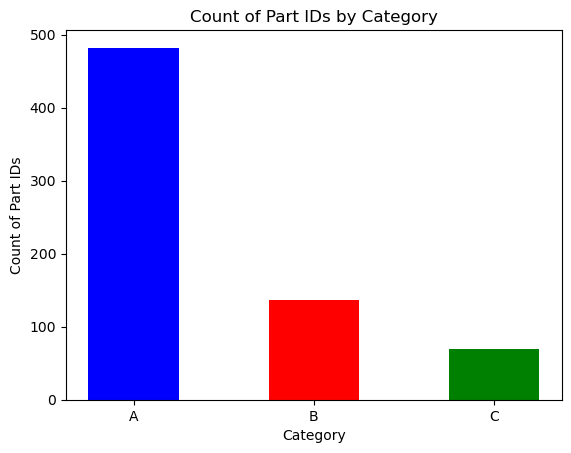

In [6]:
import matplotlib.pyplot as plt


categories = ['A', 'B', 'C']
counts = [count_A, count_B, count_C]

plt.bar(categories, counts, color=['blue', 'red', 'green'], width=0.5)
plt.xlabel('Category')
plt.ylabel('Count of Part IDs')
plt.title('Count of Part IDs by Category')
plt.show()


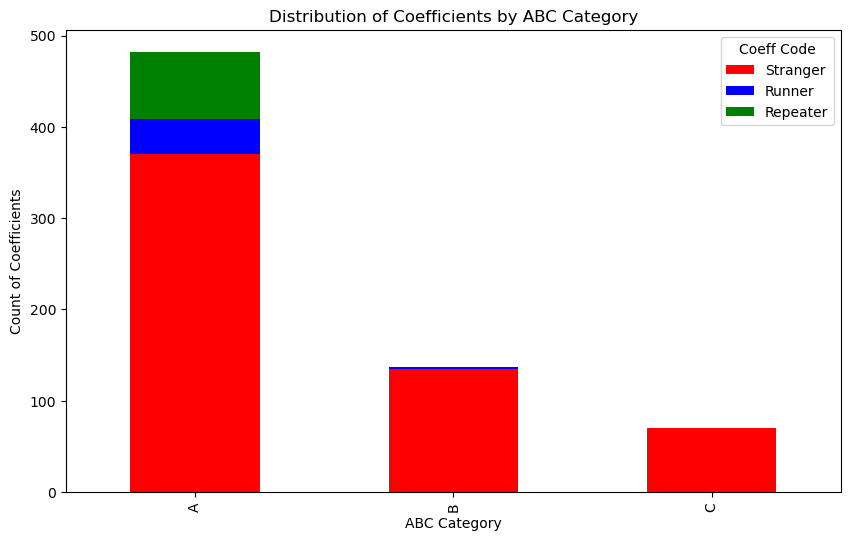

In [7]:
import matplotlib.pyplot as plt

# Combine 'Spiker' and 'Stranger' into a single category 'Stranger'
df['Coeff_Code_Combined'] = df['Coeff_Code'].replace({'Spiker': 'Stranger'})

# Calculate the count of each Coeff_Code in each ABC category
abc_coeff_counts = df.groupby(['ABC_Category', 'Coeff_Code_Combined']).size().unstack(fill_value=0)

# Reorder columns to match the order of Coeff_Code
abc_coeff_counts = abc_coeff_counts[['Stranger', 'Runner', 'Repeater']]

# Plot the stacked bar graph
abc_coeff_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'blue', 'green'])

# Add labels and title
plt.xlabel('ABC Category')
plt.ylabel('Count of Coefficients')
plt.title('Distribution of Coefficients by ABC Category')
plt.legend(title='Coeff Code')

plt.show()
